<a href="https://colab.research.google.com/github/Allanx495/Projects/blob/main/AISC_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive


drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/spam_assassin.csv')
df.head()


Mounted at /content/drive


,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [ ]:
df.shape

(5796, 2)

In [ ]:
print(df['target'].value_counts())

target
0    3900
1    1896
Name: count, dtype: int64


In [ ]:
df.columns = ["text","target"]

df.head(10)

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0
5,From tobaccodemon@terra.es Sat Sep 7 22:05:58 ...,1
6,From larlar78@MailOps.Com Sat Jun 30 00:19:08 ...,1
7,From rpm-list-admin@freshrpms.net Thu Jul 25 1...,0
8,From exmh-users-admin@redhat.com Wed Aug 7 06:...,0
9,From contractor@goldenbay.com.cy Tue Jul 23 23...,1


In [ ]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(f"[{string.punctuation}]","",text)
  text = " ".join(word for word in text.split() if word not in stop_words)
  return text

df["cleaned_text"] = df["text"].apply(clean_text)
df.head()

,text,target,cleaned_text
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,ilugadminlinuxie mon jul 29 112802 2002 return...
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,gort44excitecom mon jun 24 175421 2002 returnp...
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,forkadminxentcom mon jul 29 113957 2002 return...
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,dcm123btamailnetcn mon jun 24 174923 2002 retu...
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,ilugadminlinuxie mon aug 19 110247 2002 return...


In [ ]:
#stopwords are redundant words like the and a


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Transform the cleaned text
X = vectorizer.fit_transform(df["cleaned_text"])

# Labels
y = df["target"]
print(X.shape)  # This shows (# of emails, # of unique words/features)


(5796, 178733)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9862068965517241
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       779
           1       1.00      0.96      0.98       381

    accuracy                           0.99      1160
   macro avg       0.99      0.98      0.98      1160
weighted avg       0.99      0.99      0.99      1160



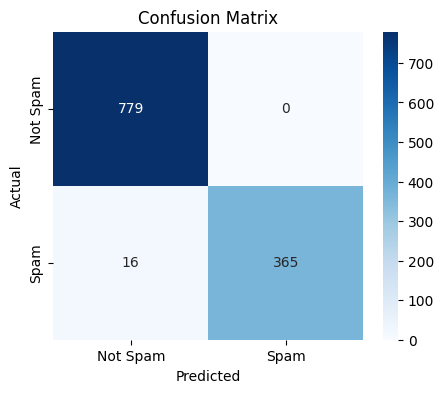

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
nb_pred = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.9293103448275862
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       779
           1       1.00      0.78      0.88       381

    accuracy                           0.93      1160
   macro avg       0.95      0.89      0.91      1160
weighted avg       0.94      0.93      0.93      1160



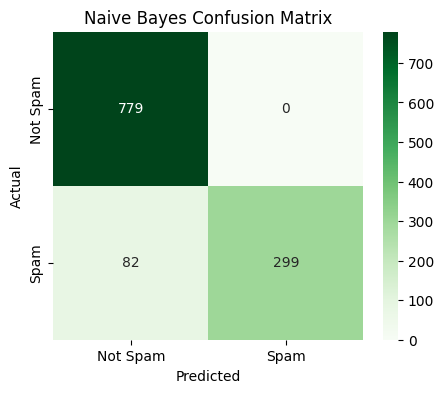

In [ ]:
nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


In [ ]:
# Thursday meeting w Houston
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(df["cleaned_text"])
y = df["target"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

Y_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, Y_pred))

Logistic Regression Accuracy: 0.9905172413793103


In [ ]:
# Meeting w Houston: Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(X_train, y_train)

y_prediction_decisionTree = decisionTreeModel.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_prediction_decisionTree))

Decision Tree Accuracy: 0.9870689655172413


In [ ]:
# 1. Install and import libraries (for Colab)
# !pip install torch scikit-learn pandas

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader

# 2. Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/spam_assassin.csv')
df.columns = ['text', 'target']

# Encode target: spam = 1, not spam = 0
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

# 3. TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['target'].values

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. PyTorch Dataset
class SpamDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(SpamDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(SpamDataset(X_test, y_test), batch_size=32)

# 6. Define the neural network
class SpamClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SpamClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # 2 output classes: spam or not spam
        )
    def forward(self, x):
        return self.net(x)

model = SpamClassifier(input_dim=1000)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Training the model
epoch_losses = []

for epoch in range(5):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    epoch_losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")



# 8. Evaluate
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")



Epoch 1, Loss: 0.2259
Epoch 2, Loss: 0.0278
Epoch 3, Loss: 0.0152
Epoch 4, Loss: 0.0079
Epoch 5, Loss: 0.0043
Accuracy: 99.74%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(all_labels, all_preds, target_names=["Not Spam", "Spam"]))


              precision    recall  f1-score   support

    Not Spam       1.00      1.00      1.00       779
        Spam       1.00      0.99      1.00       381

    accuracy                           1.00      1160
   macro avg       1.00      1.00      1.00      1160
weighted avg       1.00      1.00      1.00      1160



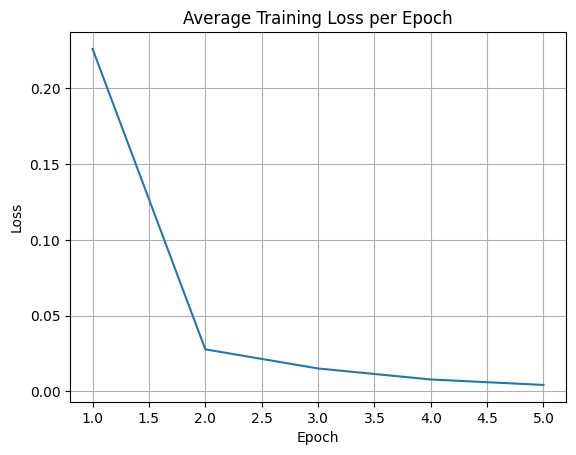

In [ ]:
import matplotlib.pyplot as plt

# inside your training loop, after loss.item():
loss_values.append(loss.item())

# plot after training
plt.plot(range(1, len(epoch_losses)+1), epoch_losses)
plt.title("Average Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()




In [ ]:
# You might not need more than 5 epochs for this dataset.
# This graph shows the average training loss per epoch for the neural network.
# A sharp decrease in loss during the first few epochs indicates that the model quickly learned to distinguish spam from non-spam.
# The near-zero loss by epoch 5 suggests high model confidence, but may also hint at potential overfitting — useful to note when evaluating generalization.


In [ ]:
import joblib
from google.colab import files

In [ ]:
import joblib
import torch

# Save the PyTorch model
torch.save(model.state_dict(), "spam_classifier.pth")

# Save the TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# Download the files to your local machine
from google.colab import files
files.download("spam_classifier.pth")
files.download("tfidf_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>